In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 7.0)

In [32]:
def getTestData(h):
    def testFunction(point):
        x = point[0]
        y = point[1]
        x_sq = np.square(x)
        y_sq = np.square(y)
        first_comp = np.square(x_sq + y - 11)
        second_comp = np.square(x + y_sq - 7)
        result = first_comp + second_comp
        return result
    def numerical_diff_x(point):
        #(f2-f0)/2h
        x = point[0]
        y = point[1]
        f0 = testFunction((x - h, y))
        f2 = testFunction((x + h, y))
        dx = (f2 - f0)/(2 * h)
        return dx
    def numerical_diff_y(point):
        #(f2-f0)/2h
        x = point[0]
        y = point[1]
        f0 = testFunction((x, y - h))
        f2 = testFunction((x, y + h))
        dy = (f2 - f0)/(2 * h)
        return dy
    def getGradientIn(point):
        return np.array([numerical_diff_x(point), numerical_diff_y(point)])
    def getAntiGradientIn(point):
        g = getGradientIn(point)
        return -getGradientIn(point)
    return testFunction, getGradientIn, getAntiGradientIn

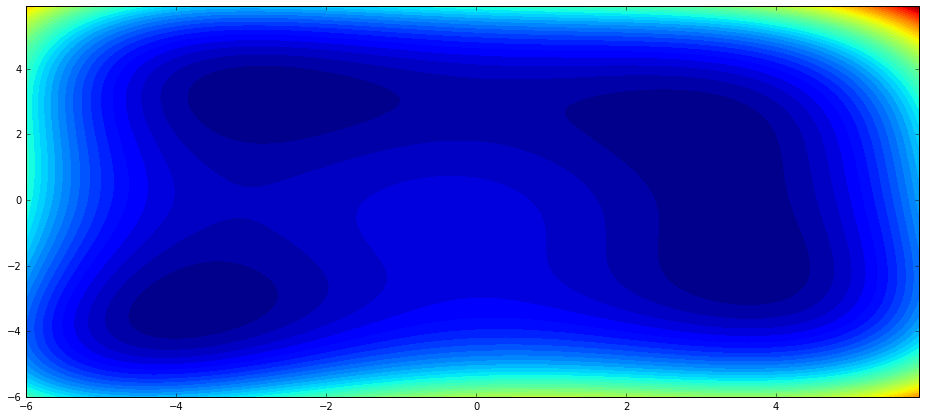

In [33]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

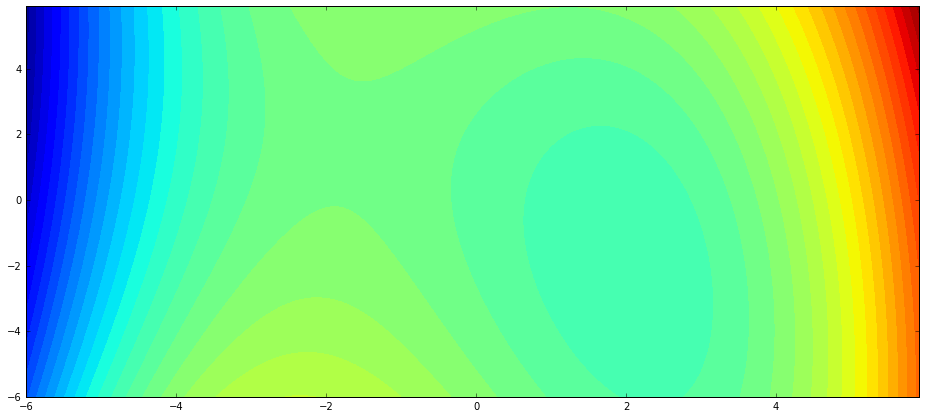

In [34]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ g(point)[0] for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

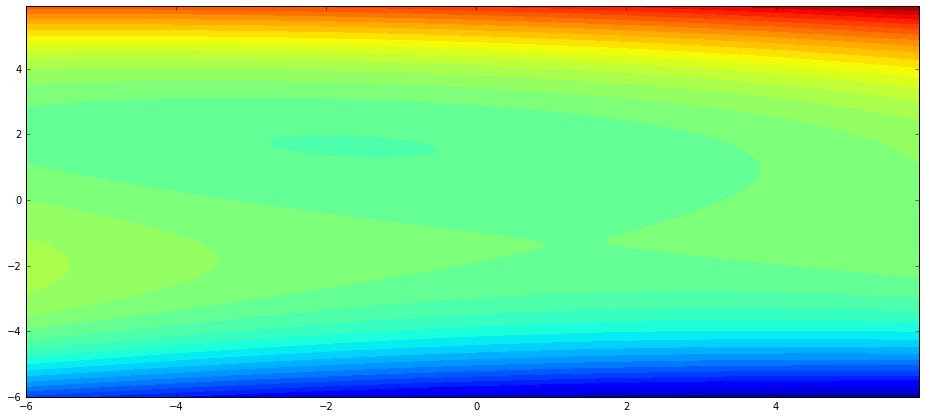

In [35]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ g(point)[1] for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

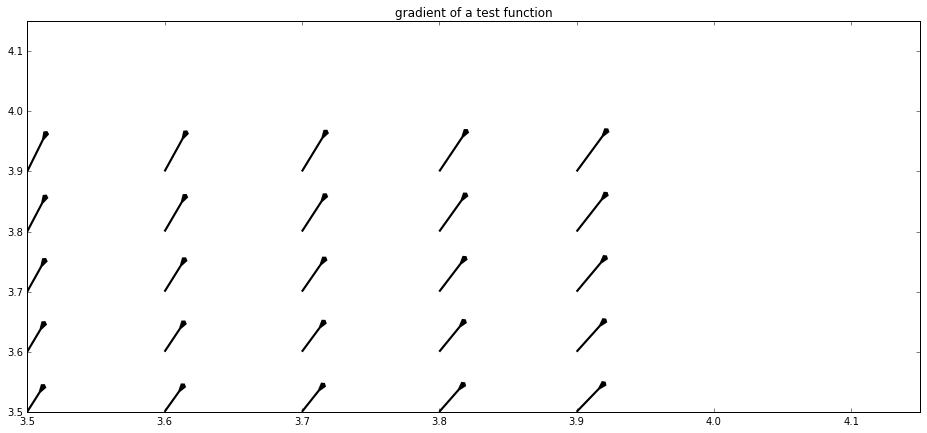

In [37]:
x = np.arange(0, 4, 0.1)
y = np.arange(0, 4, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
dx = np.array([ g(point)[0] for point in points ])
rdx = dx.reshape(xx.shape)
dy = np.array([ g(point)[1] for point in points ])
rdy = dy.reshape(xx.shape)

qplot = plt.figure()
plt.quiver(xx, yy, rdx, rdy,        # data
#            U,                   # colour the arrows based on this array
           cmap=cm.seismic,     # colour map
           headlength=1)        # length of the arrows

# plt.colorbar()                  # adds the colour bar

plt.axis([3.5, 4.15, 3.5, 4.15])

plt.title('gradient of a test function')
plt.show(qplot)                 # display the plot

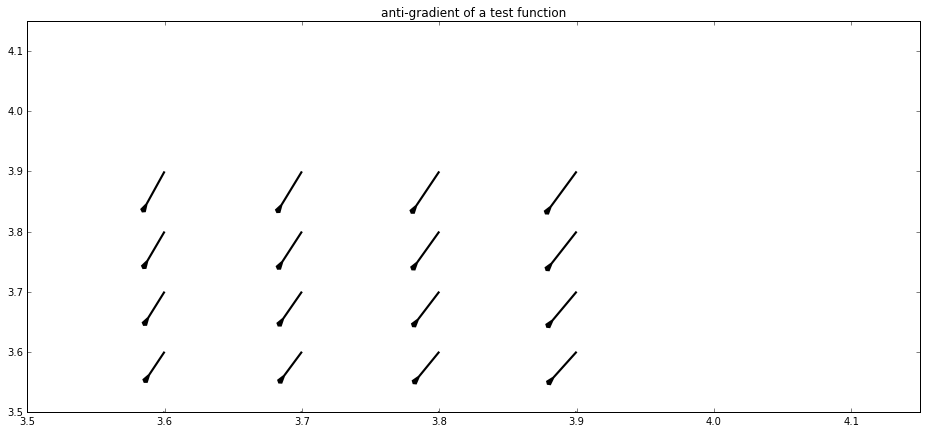

In [40]:
x = np.arange(0, 4, 0.1)
y = np.arange(0, 4, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
dx = np.array([ a(point)[0] for point in points ])
rdx = dx.reshape(xx.shape)
dy = np.array([ a(point)[1] for point in points ])
rdy = dy.reshape(xx.shape)

qplot = plt.figure()
plt.quiver(xx, yy, rdx, rdy,        # data
#            U,                   # colour the arrows based on this array
           cmap=cm.seismic,     # colour map
           headlength=1)        # length of the arrows

# plt.colorbar()                  # adds the colour bar

plt.axis([3.5, 4.15, 3.5, 4.15])

plt.title('anti-gradient of a test function')
plt.show(qplot)                 # display the plot

In [41]:
def gradient_descent_step(old, lambd):
    new = old - g(old)*lambd
    return new

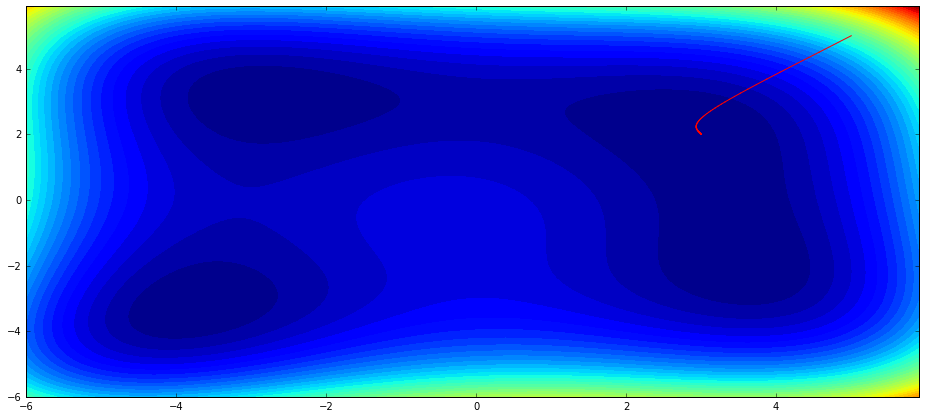

In [42]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)
old = [5,5]
for i in range(500):
    new = gradient_descent_step(old, 0.001)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    old = new

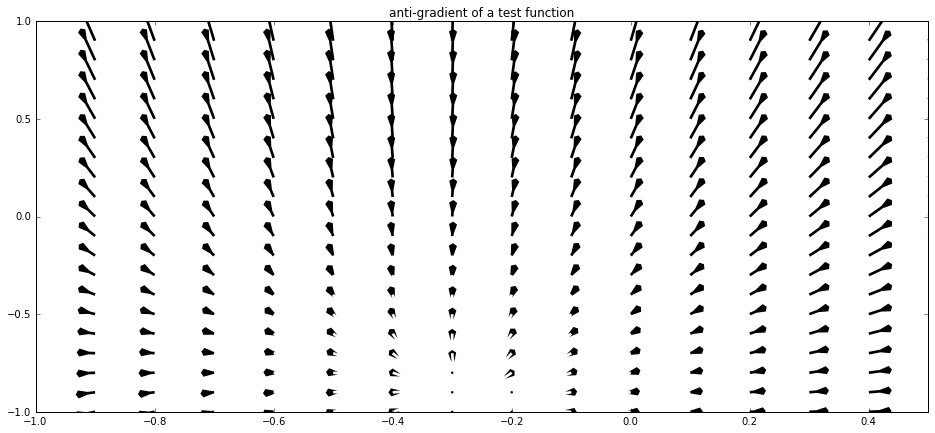

In [43]:
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
dx = np.array([ a(point)[0] for point in points ])
rdx = dx.reshape(xx.shape)
dy = np.array([ a(point)[1] for point in points ])
rdy = dy.reshape(xx.shape)

qplot = plt.figure()
plt.quiver(xx, yy, rdx, rdy,        # data
#            U,                   # colour the arrows based on this array
           cmap=cm.seismic,     # colour map
           headlength=1)        # length of the arrows

# plt.colorbar()                  # adds the colour bar

plt.axis([-1, 0.5, -1, 1])

plt.title('anti-gradient of a test function')
plt.show(qplot)                 # display the plot

In [44]:
def correct_step(point,s, n, w, e):
    point[0] = w if point[0]<w else point[0]
    point[0] = e if point[0]>e else point[0]
    point[1] = s if point[1]<s else point[1]
    point[1] = n if point[1]>n else point[1]
    return point

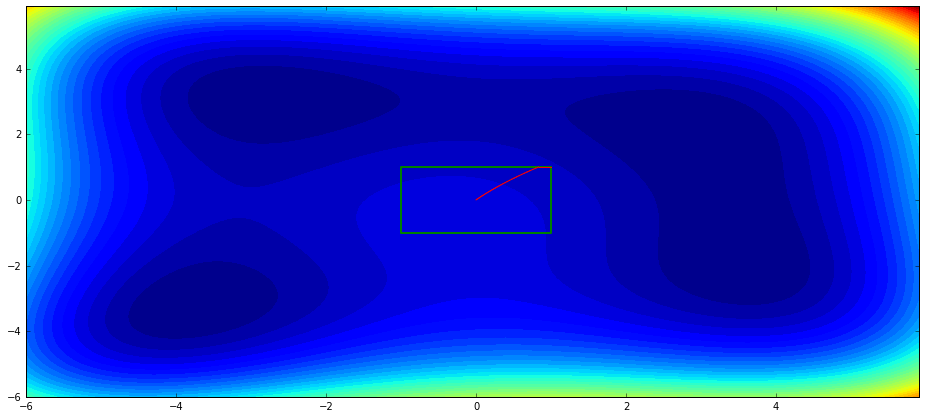

In [45]:
s = -6
n = 6
e = 6
w = -6
x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)
old = [0,0]
plt.plot([1, 1, -1, -1, 1], [1, -1, -1, 1, 1], 'g-', lw=2)
for i in range(500):
    new = gradient_descent_step(old, 0.001)
    new = correct_step(new, -1, 1, -1, 1)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    old = new

In [46]:
def getTestData2(h):
    def testFunction(point):
        x = point[0]
        y = point[1]
        x_sq = np.square(x)
        y_sq = np.square(y)
        first_comp = np.square(x_sq + y - 11)
        second_comp = np.square(x + y_sq - 7)
        third_comp = 0.1*(np.square(x-3)+np.square(y-2))
        result = first_comp + second_comp + third_comp
        return result
    def numerical_diff_x(point):
        #(f2-f0)/2h
        x = point[0]
        y = point[1]
        f0 = testFunction((x - h, y))
        f2 = testFunction((x + h, y))
        dx = (f2 - f0)/(2 * h)
        return dx
    def numerical_diff_y(point):
        #(f2-f0)/2h
        x = point[0]
        y = point[1]
        f0 = testFunction((x, y - h))
        f2 = testFunction((x, y + h))
        dy = (f2 - f0)/(2 * h)
        return dy
    def getGradientIn(point):
        return np.array([numerical_diff_x(point), numerical_diff_y(point)])
    def getAntiGradientIn(point):
        g = getGradientIn(point)
        return -getGradientIn(point)
    return testFunction, getGradientIn, getAntiGradientIn

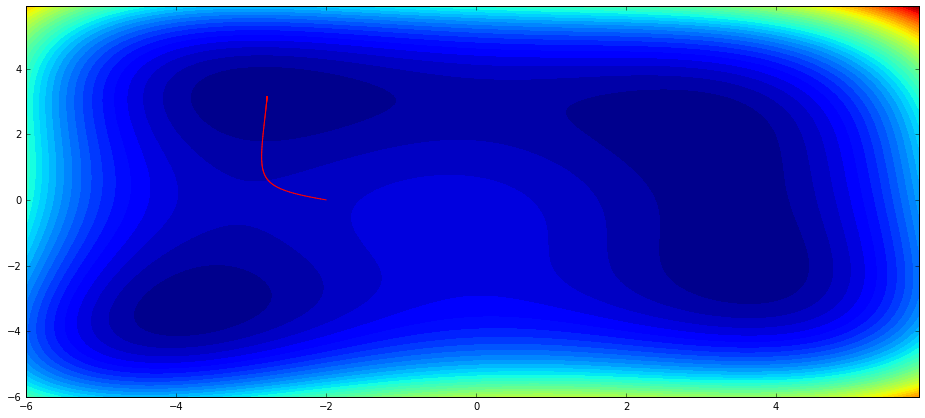

In [47]:
s = -6
n = 6
e = 6
w = -6
x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData2(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)
old = [-2,0]
for i in range(500):
    new = gradient_descent_step(old, 0.001)
    new = correct_step(new, s, n, w, e)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    old = new

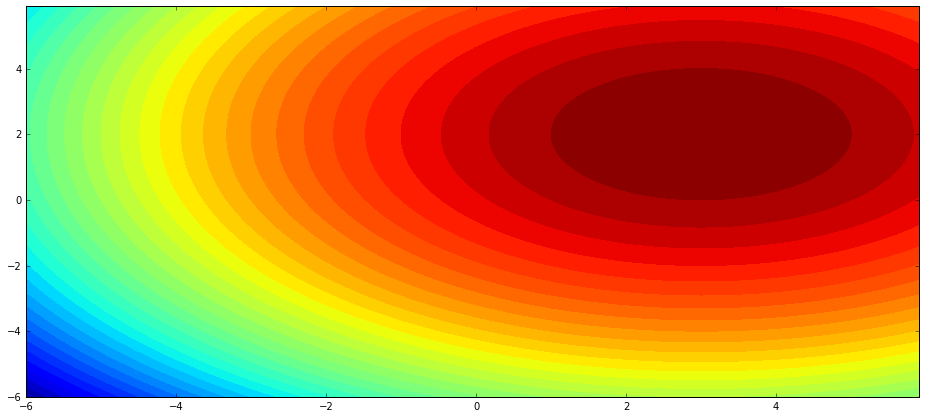

In [48]:
f1, a1, g1 = getTestData(1e-10)
f2, a2, g2 = getTestData2(1e-10)

x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)


xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f1(point)-f2(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 40)

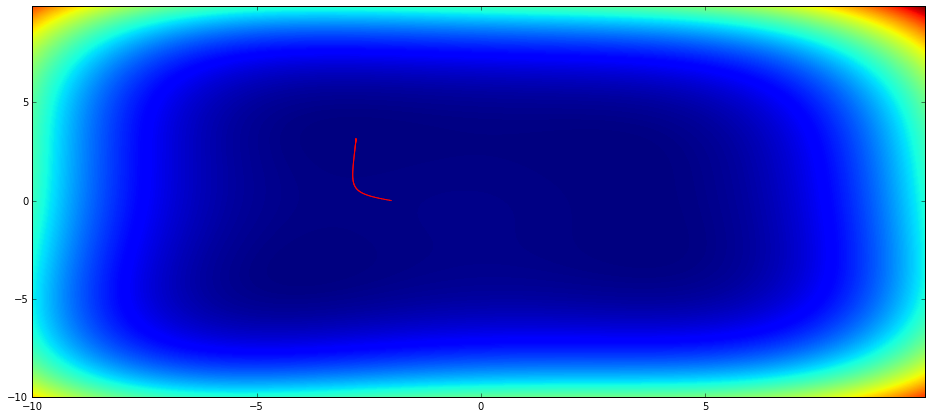

In [49]:
s = -10
n = 10
e = 10
w = -10
x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData2(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 1000)
old = [-2,0]
for i in range(500):
    new = gradient_descent_step(old, 0.001)
    new = correct_step(new, s, n, w, e)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    old = new

In [50]:
def should_stop(old, new, eps):
    d = math.sqrt(np.sum(np.square(old - new)))
    return d < eps

result in 1279 steps


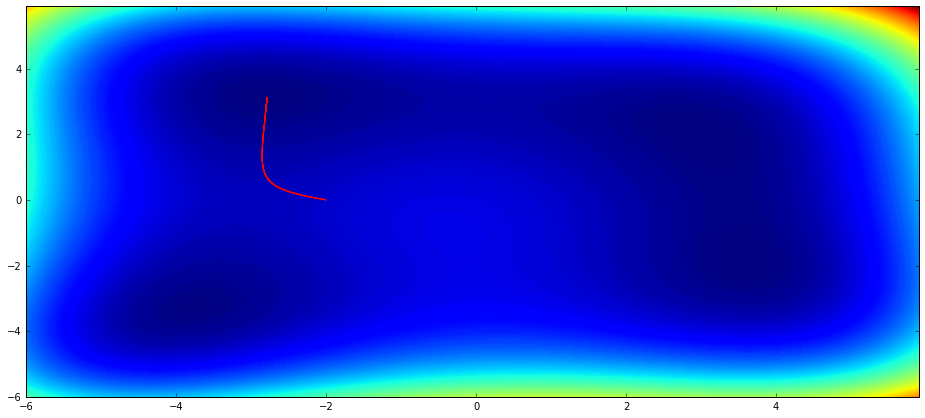

In [51]:
s = -6
n = 6
e = 6
w = -6
x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData2(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 250)
old = [-2,0]
i=0
max_steps=10000
while(i < max_steps):
    i+=1
    new = gradient_descent_step(old, 0.0001)
    new = correct_step(new, s, n, w, e)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    if(should_stop(old, new, 0.0001)):
        break
    old = new
print("result in " + str(i) + " steps")

result in 1279 steps


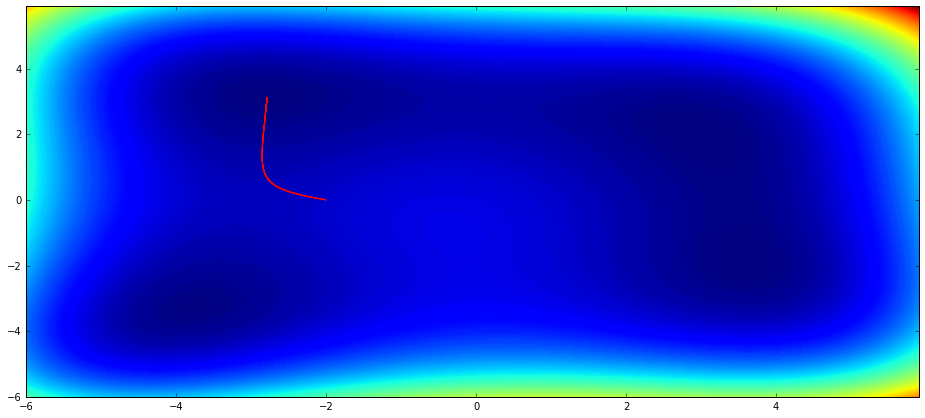

In [52]:
s = -6
n = 6
e = 6
w = -6
x = np.arange(w, e, 0.1)
y = np.arange(s, n, 0.1)
xx, yy = np.meshgrid(x, y)
f, g, a = getTestData2(1e-10)
xravel = np.ravel(xx)
yravel = np.ravel(yy)
points = list(zip(xravel, yravel))
z = np.array([ f(point) for point in points ])
zz = z.reshape(xx.shape)
h = plt.contourf(xx, yy, zz, 250)
old = [-2,0]
i=0
max_steps=10000
while(i < max_steps):
    i+=1
    new = gradient_descent_step(old, 0.0001)
    new = correct_step(new, s, n, w, e)
    plt.plot([old[0], new[0]], [old[1], new[1]], 'r-', lw=1)#hack
    if(should_stop(old, new, 0.0001)):
        break
    old = new
print("result in " + str(i) + " steps")